## Analysis of acoustic signals - plain code

<img src="figures_blog/sliding_lid.png" width=500>

In [1]:
from acoustics import generalized_detrending, sorted_density, sorted_density_feature, gaussian_sorted_density
from acoustics_helpers import remove_direct_sound, curve_fitting_echo_density

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

c:\users\helena\anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
with h5py.File('data.h5', 'r') as hf:
    Fs_array = list(hf['Fs'])
    dataset_simulation_polybox = list(hf['dataset_simulation_polybox'])
    dataset_simulation_sliding_lid = list(hf['dataset_simulation_sliding_lid'])
    dataset_measurement_volume = list(hf['dataset_measurement_volume'])

In [4]:
Fs = Fs_array[1]

In [5]:
# ws stands for window size
ws_detrending = int(0.025*Fs)     # 25ms
ws_sorted_density = int(0.2*Fs)   # 200ms
milliseconds_to_remove = 10 # for the remove the direct path function
signal_length = 1

In [6]:
gaussian_sd = gaussian_sorted_density(ws_detrending)
print('Sorted density for Gaussian signal: ', gaussian_sd)

Sorted density for Gaussian signal:  0.18324222812231664


In [7]:
labels = ['closed', 'almost_closed', 'almost_open', 'open']

In [8]:
from collections import defaultdict
data = defaultdict()
for i in range(len(labels)):
    data[labels[i]] = dataset_simulation_sliding_lid[i]
data_simulation_sliding_lid = pd.DataFrame(data = data, index = pd.timedelta_range(start=pd.Timedelta(days=0), 
                                                                                         freq=str(round(1000/Fs, 5)) + 'ms', 
                                                                                         periods=len(dataset_simulation_sliding_lid[0])))
data_simulation_sliding_lid.head()

c:\users\helena\anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,almost_closed,almost_open,closed,open
00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
00:00:00.000170,4.372601e-07,4.443116e-07,4.443116e-07,4.456350e-07
00:00:00.000340,1.283440e-05,1.300656e-05,1.300656e-05,1.303693e-05
00:00:00.000510,4.311583e-05,4.364509e-05,4.364509e-05,4.377377e-05
00:00:00.000680,1.957845e-05,1.987153e-05,1.987153e-05,1.991281e-05


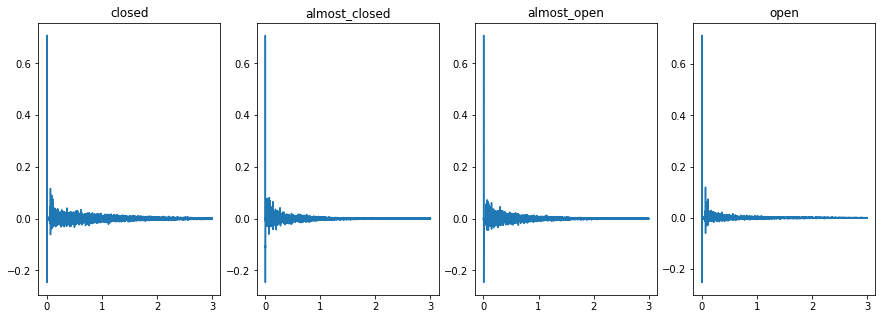

In [9]:
t = np.array(range(data_simulation_sliding_lid.shape[0]))/Fs
fig, ax = plt.subplots(1,4,figsize=(15,5))
for i in range(len(labels)):
    ax[i].plot(t, data_simulation_sliding_lid[labels[i]])
    ax[i].set_title(labels[i])

c:\users\helena\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


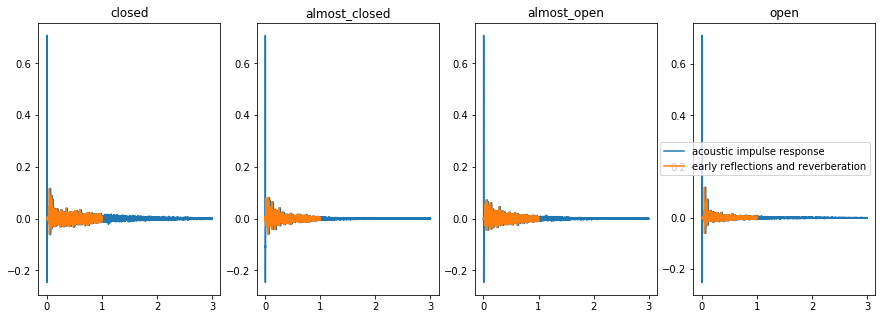

In [10]:
data_dir = defaultdict()
fig, ax = plt.subplots(1,4,figsize=(15,5))
for i in range(len(labels)):
    signal = data_simulation_sliding_lid[labels[i]]
    ax[i].plot(t[:len(signal)], signal, label='acoustic impulse response')
    data_dir[labels[i]] = remove_direct_sound(signal, Fs, signal_length)
    ax[i].plot(t[:len(data_dir[labels[i]])], data_dir[labels[i]], label='early reflections and reverberation')
    ax[i].set_title(labels[i])
plt.legend()

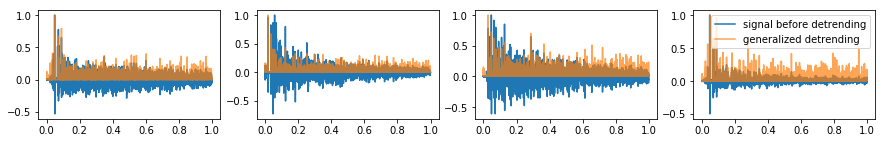

In [11]:
data_dtr = defaultdict()
fig, ax = plt.subplots(1,4,figsize=(15,2))
for i in range(len(labels)):
    signal = data_dir[labels[i]]
    ax[i].plot(t[:len(signal)], signal/np.max(np.abs(signal)), alpha=1, label='signal before detrending')
    data_dtr[labels[i]] = generalized_detrending(signal.to_numpy(), ws_detrending)
    ax[i].plot(t[:len(data_dtr[labels[i]])], data_dtr[labels[i]]/np.max(np.abs(data_dtr[labels[i]])), alpha=0.7, label='generalized detrending')
plt.legend()

No handles with labels found to put in legend.


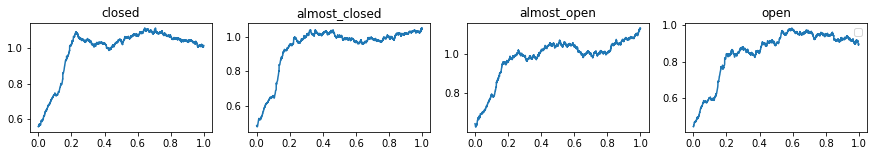

In [13]:
data_srt = defaultdict()
fig, ax = plt.subplots(1,4,figsize=(15,2))
for i in range(len(labels)):
    signal = data_dtr[labels[i]]
    data_srt[labels[i]] = sorted_density_feature(signal, ws_sorted_density)
    data_srt[labels[i]] = data_srt[labels[i]]/gaussian_sd
    n, curve = curve_fitting_echo_density(data_srt[labels[i]], Fs)
    ax[i].plot(t[:len(data_srt[labels[i]])], data_srt[labels[i]])
    #ax[i].plot(t[:len(curve)], curve)
    ax[i].set_title(labels[i])
plt.legend()

In [43]:
# simulations: polybox, 1, curve fitting
# simulations: sliding lid, 1, curve fitting
# measurements: volume, 1, curve fitting 2

In [ ]:
#2nd version of curve fitting:
data_points_in = data_points_in(round(Fs)*0.02:end);
E0 = data_points_in(1);
data_points = max(data_points_in - E0, 0) + 0.0001;
index = 0;
t = (index + (1:length(data_points)))/Fs; 
t_bias = 0.03; % comes from the removal of the direct path